### **6. Разбить данные на обучающую и тестовую выборки**
### **7. Запустить классификатор (ререссию) ближайших соседей или другой метод (аргументируйте выбор!)**
### **8. Вычислить ошибки на обучающей и тестовой выборках. Выбрать оптимальное значение гиперпараметра (к-ва ближайших соседей) Сделать выводы**

In [2]:
# Подключение к моему гугл диску, чтобы можно было обратиться к датасету напрямую.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
dataset = pd.read_csv('/content/gdrive/MyDrive/Machine_Learning_Ermolaev_382003_3/After_3-5_Horror_movie_IMDB.csv')
dataset.to_excel('subset_data.xlsx', index=False)

dataset

,Title,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Filming Locations,Budget,...,Vietnamese,Latin,Serbian,Catalan,Ukrainian,Persian,American Sign Language,Bulgarian,Polish,Bengali
0,Gut (2012),0.0,0.929577,0.392667,3.900000,0.470238,"Directed by Elias. With Jason Vail, Nicholas W...",0.422878,0.897436,0.018088,...,0,0,0,0,0,0,0,0,0,0
1,The Haunting of Mia Moss (2017),1.0,0.929577,0.392667,3.833333,0.452381,"Directed by Jake Zelch. With Nicola Fiore, Bri...",0.725586,0.935897,0.000158,...,0,0,0,0,0,0,0,0,0,0
2,Sleepwalking (2017),1.0,0.140845,0.392667,3.766667,0.434524,"Directed by David Briggs. With Alysia Topol, A...",0.046547,0.153846,0.004592,...,0,0,0,0,0,0,0,0,0,0
3,Treasure Chest of Horrors II (2013),0.2,0.929577,0.200000,3.700000,0.416667,"Directed by M. Kelley, Shawn C. Phillips, Alex...",0.967448,0.897436,0.009026,...,0,0,0,0,0,0,0,0,0,0
4,Infidus (2015),0.6,0.929577,0.200000,5.800000,0.404762,"Directed by Giulio De Santi. With Bonini Mino,...",0.128080,0.935897,0.013461,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3298,Victor Frankenstein (2015),0.6,0.929577,0.400000,6.000000,0.583333,Directed by Paul McGuigan. With Daniel Radclif...,0.226650,0.884615,0.210526,...,0,0,0,0,0,0,0,0,0,0
3299,The Exorcism of Molly Hartley (2015),0.6,0.929577,0.900000,4.600000,0.500000,"Directed by Steven R. Monroe. With Sarah Lind,...",0.839367,0.153846,0.157895,...,0,0,0,0,0,0,0,0,0,0
3300,Talon Falls (2017),1.0,0.929577,0.700000,4.600000,0.375000,"Directed by Joshua Shreve. With Brad Bell, Jor...",0.129297,0.935897,0.105263,...,0,0,0,0,0,0,0,0,0,0
3301,BloodRayne: The Third Reich (2011),0.0,0.436620,0.500000,3.000000,0.398810,"Directed by Uwe Boll. With Natassia Malthe, Br...",0.713721,0.217949,0.052632,...,0,0,0,0,0,0,0,0,0,0


### **6. Разбить данные на обучающую и тестовую выборки**

In [4]:
print(dataset.columns)

Index(['Title', 'Release Date', 'Release Country', 'Movie Rating',
       'Review Rating', 'Movie Run Time', 'Plot', 'Cast', 'Filming Locations',
       'Budget', ' Action', ' Adult', ' Adventure', ' Animation', ' Biography',
       ' Comedy', ' Crime', ' Drama', ' Family', ' Fantasy', ' History',
       ' Horror', ' Music', ' Musical', ' Mystery', ' Reality-TV', ' Romance',
       ' Sci-Fi', ' Sport', ' Thriller', ' War', ' Western', 'English',
       'Spanish', 'Japanese', 'German', 'Hindi', 'Filipino', 'French',
       'Tagalog', 'Thai', 'Tamil', 'Turkish', 'Russian', 'Indonesian',
       'Italian', 'Mandarin', 'Korean', 'Swedish', 'Portuguese', 'Telugu',
       'Chinese', 'Malayalam', 'Malay', 'Cantonese', 'Kannada', 'Danish',
       'Norwegian', 'Dutch', 'Arabic', 'Romanian', 'Hungarian', 'Vietnamese',
       'Latin', 'Serbian', 'Catalan', 'Ukrainian', 'Persian',
       'American Sign Language', 'Bulgarian', 'Polish', 'Bengali'],
      dtype='object')


In [5]:
from sklearn.model_selection import train_test_split
# Определение признаков (features) и целевой переменной (target)
#selected_features = ['Release Date','Release Country','Movie Rating',
#            'Movie Run Time','Cast','Filming Locations','Budget']
X = dataset.drop(['Title','Review Rating', 'Plot'], axis=1)  # Признаки (все столбцы, кроме 'Title','Review Rating','Plot')
y = dataset['Review Rating']  # Целевая переменная

# Разделение на тренировочную и тестовую выборки (например, 80% для обучения, 20% для тестирования)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(2642, 661)



---


### **Запустить классификатор (ререссию) ближайших соседей или другой метод (аргументируйте выбор!)**

**1. K-ближайших соседей (KNN):**

*Когда использовать:* KNN хорошо работает в задачах, где объекты с похожими признаками обычно имеют схожие целевые переменные.

*Преимущества:* Прост в реализации, не требует предположений о данных.

*Недостатки:* Медленный при большом количестве данных, чувствителен к шуму и выбросам.

**2. Линейная регрессия:**

*Когда использовать:* Хорошо подходит, когда существует линейная зависимость между признаками и целевой переменной.

*Преимущества*: Прост в интерпретации, быстрый, подходит для больших данных.

*Недостатки:* Предполагает линейность, не учитывает сложные взаимосвязи.

**3. Случайный лес (Random Forest):**

*Когда использовать:* Эффективен в задачах с большим количеством данных и высокой размерностью признаков. Дает хорошие результаты без настройки гиперпараметров.

*Преимущества:* Меньше подвержен переобучению, хорошо работает на больших наборах данных, учитывает важность признаков.

*Недостатки:* Может быть медленным при огромных данных, сложно интерпретировать.

**4. Нейронные сети (MLPRegressor в scikit-learn):**

*Когда использовать:* Подходит для задач с большими объемами данных и сложными взаимосвязями между признаками.

*Преимущества:* Может моделировать сложные зависимости, способен извлекать паттерны из данных.

*Недостатки:* Требуется настройка гиперпараметров, большой объем данных для обучения, может переобучаться.



---


***Исходя из приведённых мною данных, я буду использовать классификатор "Случайный лес" и "Нейронные сети"***. Свой выбор я обосновываю тем, что в прошлых заданиях мы не нашли сильной связи между признаками, при этом признаков стало достаточно много.

**Случайный Лес**:
Сначала просто реализуем данный способ классификации и посмотрим на результаты среднеквадратичной ошибки

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация модели случайного леса
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Обучение модели
random_forest.fit(X_train, y_train)

# Предсказание на тестовой выборке
predictions_test = random_forest.predict(X_test)

# Предсказание на тренировочной выборке (для целей сравнения)
predictions_train = random_forest.predict(X_train)

# Оценка точности модели на тестовой выборке (с использованием R-квадрата и MSE)
r2_test = r2_score(y_test, predictions_test)
mse_test = mean_squared_error(y_test, predictions_test)

# Оценка точности модели на тренировочной выборке (для сравнения)
r2_train = r2_score(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)

# Вывод результатов
print("Тестовая выборка: R-квадрат =", r2_test, "MSE =", mse_test)
print("Тренировочная выборка: R-квадрат =", r2_train, "MSE =", mse_train)

Тестовая выборка: R-квадрат = 0.06480388950928151 MSE = 1.837084479061607
Тренировочная выборка: R-квадрат = 0.8753326680153777 MSE = 0.2647550254226596


**Тестовая выборка:**

**R-квадрат = 0.06259504908193925**
Это означает, что наша модель на тестовой выборке объясняет около 6.26% вариации зависимой переменной. Это достаточно низкий показатель и может указывать на то, что ваша модель не очень хорошо подходит для предсказания тестовых данных.

**MSE = 1.84142349033451**
Это средняя ошибка квадрата между фактическими и предсказанными значениями. Чем меньше значение MSE, тем лучше. Значение около 1.84 означает, что модель имеет некоторую ошибку в среднем при предсказании на тестовых данных.

**Тренировочная выборка:**

**R-квадрат = 0.8751148731062484**
Это означает, что ваша модель на тренировочной выборке объясняет около 87.51% вариации зависимой переменной. Это высокий показатель и говорит о хорошем соответствии модели тренировочным данным.

**MSE = 0.2652175547459837**
Значение около 0.27 показывает, что модель имеет меньшую ошибку при предсказании на тренировочных данных по сравнению с тестовыми.

### ***Обратим внимание, что большая разница между показателями на тестовой и тренировочной выборках может свидетельствовать о переобучении модели.***



### **Подберём гиперпараметры.**

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Задаем модель
model = RandomForestRegressor()

# Задаем сетку параметров для перебора
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Задаем Grid Search с кросс-валидацией
grid_search = GridSearchCV(model, param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=1, verbose=2)

grid_search.fit(X, y)

# Получаем лучшие параметры
best_params = grid_search.best_params_

# Получаем лучшую модель
best_model = grid_search.best_estimator_

# Получим предсказания на тестовой и тренировочной выборках
predictions_test = best_model.predict(X_test)
predictions_train = best_model.predict(X_train)

# Рассчитаем R-квадрат для тестовой и тренировочной выборок
r2_test = r2_score(y_test, predictions_test)
r2_train = r2_score(y_train, predictions_train)

# Рассчитаем среднеквадратичную ошибку для тестовой и тренировочной выборок
mse_test = mean_squared_error(y_test, predictions_test)
mse_train = mean_squared_error(y_train, predictions_train)

# Выведем результаты
print("Тестовая выборка: R-квадрат =", r2_test, "MSE =", mse_test)
print("Тренировочная выборка: R-квадрат =", r2_train, "MSE =", mse_train)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   4.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   5.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.4s
[CV] END m

БЫЛО:

Тестовая выборка: R-квадрат = 0.06259504908193925 MSE = 1.84142349033451

Тренировочная выборка: R-квадрат = 0.8751148731062484 MSE = 0.2652175547459837


СТАЛО:

Тестовая выборка: R-квадрат = 0.4145382579581587 MSE = 1.1500718056077837

Тренировочная выборка: R-квадрат = 0.4044688398505262 MSE = 1.26472480749655

Т.к. необходимо чтоб R-квадрат быль большим, а MSE малым, мы видим, что результаты на тестовой и тренировочной выброках стали приблизительно одинаковыми. И при этом Значение R-квадрат стало куда меньше, что свидетельствует о том, что модель стала справляться куда лучше.

In [8]:
# Выберем случайный фильм из вашего датасета
selected_features = ['Release Date','Release Country','Movie Rating',
            'Movie Run Time','Cast','Filming Locations','Budget']

random_film = dataset.sample(1)
print("Название фильма:", random_film['Title'].values[0])

#random_film = random_film.loc[:, selected_features]

# Оставим только признаки, которые использовались для обучения модели (исключая 'Title', 'Review Rating', 'Plot')
selected_features = random_film.drop(['Title','Review Rating' ,'Plot'], axis=1)

# Предсказание оценки для отдельного случайного фильма
predicted_rating = best_model.predict(selected_features)

print("Предсказанная оценка фильма:", predicted_rating)

Название фильма: Go Goa Gone (2013)
Предсказанная оценка фильма: [5.30702287]


**Нейронные сети (MLPRegressor в scikit-learn)**

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

model2 = MLPRegressor(hidden_layer_sizes=(100,50), max_iter=1000)
model2.fit(X_train, y_train)

# Предсказание на тестовой выборке
predictions_test = model2.predict(X_test)

# Предсказание на тренировочной выборке (для целей сравнения)
predictions_train = model2.predict(X_train)

# Оценка точности модели на тестовой выборке (с использованием R-квадрата и MSE)
r2_test = r2_score(y_test, predictions_test)
mse_test = mean_squared_error(y_test, predictions_test)

# Оценка точности модели на тренировочной выборке (для сравнения)
r2_train = r2_score(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)

# Вывод результатов
print("Тестовая выборка: R-квадрат =", r2_test, "MSE =", mse_test)
print("Тренировочная выборка: R-квадрат =", r2_train, "MSE =", mse_train)


Тестовая выборка: R-квадрат = -0.34752819986431294 MSE = 2.6470631275076557
Тренировочная выборка: R-квадрат = 0.49359534448221387 MSE = 1.0754475555978256


In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression

# Создание модели
model2 = MLPRegressor()

# Задание сетки параметров для подбора
param_grid = {
    'hidden_layer_sizes': [(50,50), (50,100,50), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.05],
    'max_iter': [1000],
}

# Поиск по сетке
grid_search = GridSearchCV(model2, param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=1, verbose=2)
grid_search.fit(X, y)

# Получаем лучшие параметры
best_params = grid_search.best_params_

# Получаем лучшую модель
best_model = grid_search.best_estimator_

# Предсказание на тестовой выборке
predictions_test = best_model.predict(X_test)

# Предсказание на тренировочной выборке (для целей сравнения)
predictions_train = best_model.predict(X_train)

# Оценка точности модели на тестовой выборке (с использованием R-квадрата и MSE)
r2_test = r2_score(y_test, predictions_test)
mse_test = mean_squared_error(y_test, predictions_test)

# Оценка точности модели на тренировочной выборке (для сравнения)
r2_train = r2_score(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)

# Вывод результатов
print("Тестовая выборка: R-квадрат =", r2_test, "MSE =", mse_test)
print("Тренировочная выборка: R-квадрат =", r2_train, "MSE =", mse_train)


Fitting 2 folds for each of 36 candidates, totalling 72 fits
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=1000, solver=adam; total time=   7.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=1000, solver=adam; total time=  10.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=1000, solver=sgd; total time=  17.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=1000, solver=sgd; total time=  16.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), max_iter=1000, solver=adam; total time=  11.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), max_iter=1000, solver=adam; total time=   3.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), max_iter=1000, solver=sgd; total time=  22.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), max_iter=1000, solver=sgd; total time=  29.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=1000, solver=adam; total time=  10.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=1000, solver=adam; total time=  11.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=1000, solver=sgd; total time=  13.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=1000, solver=sgd; total time=   7.5s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), max_iter=1000, solver=adam; total time=   4.4s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), max_iter=1000, solver=adam; total time=   9.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), max_iter=1000, solver=sgd; total time=  20.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), max_iter=1000, solver=sgd; total time=  16.6s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), max_iter=1000, solver=adam; total time=   9.1s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), max_iter=1000, solver=adam; total time=   9.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), max_iter=1000, solver=sgd; total time=  29.6s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), max_iter=1000, solver=sgd; total time=  28.9s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), max_iter=1000, solver=adam; total time=   6.4s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), max_iter=1000, solver=adam; total time=  11.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), max_iter=1000, solver=sgd; total time=  15.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), max_iter=1000, solver=sgd; total time=  14.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=1000, solver=adam; total time=  11.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=1000, solver=adam; total time=   9.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=1000, solver=sgd; total time=  14.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=1000, solver=sgd; total time=  10.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), max_iter=1000, solver=adam; total time=  33.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), max_iter=1000, solver=adam; total time=  19.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), max_iter=1000, solver=sgd; total time=  17.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 1

In [11]:
from sklearn.neural_network import MLPRegressor
# Выберем случайный фильм из вашего датасета
selected_features = ['Release Date','Release Country','Movie Rating',
            'Movie Run Time','Cast','Filming Locations','Budget']

#random_film = dataset.sample(1)
random_film = dataset[dataset['Title'] == "The Other Side of the Door (2016)"]
# Оставим только признаки, которые использовались для обучения модели (исключая 'Title', 'Review Rating', 'Plot')
selected_features = random_film.drop(['Title','Review Rating' ,'Plot'], axis=1)

print("Название фильма:", random_film['Title'].values[0])
# Предсказание оценки для отдельного случайного фильма
predicted_rating = best_model.predict(selected_features)
print("Предсказанная оценка фильма:", predicted_rating)

Название фильма: The Other Side of the Door (2016)
Предсказанная оценка фильма: [4.44822905]


## ***ВЫВОД***
Я выполнил 8 пунктов из домашнего задания:

0. Описать задачу словами
1. Прочитать данные
2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
3. Обработать пропущенные значения (или убедиться, что их нет)
4. Обработать категориальные признаки
5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)
6. Разбить данные на обучающую и тестовую выборки
7. Запустить классификатор (ререссию) ближайших соседей или другой метод (аргументируйте выбор!)
8. Вычислить ошибки на обучающей и тестовой выборках. Выбрать оптимальное значение гиперпараметра (к-ва ближайших соседей) Сделать выводы

После того, как я попытался решить задачу регрессии двумя разными способами, а именно при помощи метода "Случайный лес" и "Нейронные сети", я обнаружил, что результат полученный "Случайного леса" оказался лучшим.

Что могло к этому привести?

**Сложность данных:** Возможно, данные имеют более сложную или нелинейную структуру, которую легче уловить и предсказать с помощью ансамбля деревьев (случайный лес) в сравнении с нейронными сетями.

**Переобучение:** MLPRegressor (нейронные сети) могут иметь больше параметров для обучения, и могут быть более склонны к переобучению при недостаточном контроле или при работе с небольшими данными.

**Гиперпараметры:** Возможно, набор гиперпараметров, использованный в MLPRegressor, не оптимален. Нейронные сети требуют аккуратного подбора гиперпараметров, таких как количество слоев, количество нейронов в слоях, скорость обучения и другие, чтобы достичь оптимальной производительности.

Возможно необходимо дополнительно как-то иначе преобразовать изначальные текстовые признаки чтобы методы работали куда лучше, чем это есть на самом деле.



---



# **Последняя домашняя работа. (29 декабря)**

Обучить на ваших данных:
1.   Логистическую регрессию (линейная)
2.   RandomForest
3.   Полносвязную (неглубокую - скрытых 1-2 слоя) нейронную сеть

По крайней мере для одной из моделей найти оптимальные занчения гиперпарамтров и построить графики зависимости ошибки от них (например, для нейронных сетей от параметра alpha и от количества нейронов).

Наблюдается ли переобучение/недообучение? Какой метод лучше? Обязательно изобразите confusion matrix! Все ли с ней хорошо? Если нет, то что можно сделать? Сделайте выводы.


Важно отметить, что модель логистической регрессии используется для бинарной классификации, а не для задачи регрессии, где целевая переменная является непрерывной. Для задачи регрессии, в которой требуется предсказывать оценку фильма (непрерывное значение), более подходящим выбором будет использование модели линейной регрессии.

In [12]:
# Подключение к моему гугл диску, чтобы можно было обратиться к датасету напрямую.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Загрузим наш датасет.

In [13]:
import pandas as pd
dataset = pd.read_csv('/content/gdrive/MyDrive/Machine_Learning_Ermolaev_382003_3/After_3-5_Horror_movie_IMDB.csv')



---



**Линейная Регрессия**

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

X = dataset.drop(['Title','Review Rating', 'Plot'], axis=1)  # Признаки (все столбцы, кроме 'Title','Review Rating','Plot')
y = dataset['Review Rating']  # Целевая переменная

# Разделение на тренировочную и тестовую выборки (например, 70% для обучения, 30% для тестирования)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=56)

# Создание и обучение модели линейной регрессии
model = LinearRegression()

model.fit(X_train, y_train)  # Обучение модели на тренировочных данных
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


# Вывод результатов
print("Тестовая выборка: R-квадрат =", r2_score(y_test, y_test_pred) , "MSE =", mean_squared_error(y_test, y_test_pred))
print("Тренировочная выборка: R-квадрат =",r2_score(y_train, y_train_pred), "MSE =", mean_squared_error(y_train, y_train_pred))


Тестовая выборка: R-квадрат = 0.08476078109824281 MSE = 1.9412398611373363
Тренировочная выборка: R-квадрат = 0.14069751404521502 MSE = 1.7886569791589195


Значения R-квадрат и MSE в данном контексте указывают на то, насколько хорошо ваша модель линейной регрессии соответствует данным и какова среднеквадратическая ошибка предсказаний.

Значение R-квадрат в пределах от 0 до 1. Чем ближе к 1, тем лучше модель соответствует данным. Здесь значение R-квадрат невысокое (0.141), что может указывать на то, что ваша модель не объясняет большую часть дисперсии в данных.

Значение MSE показывает среднеквадратическую ошибку между фактическими и предсказанными значениями. Низкое значение MSE (1.789 на тренировочной и 1.941 на тестовой) хорошо, но оно должно оцениваться в контексте вашей конкретной задачи.

In [15]:
from sklearn.neural_network import MLPRegressor
# Выберем случайный фильм из вашего датасета
selected_features = ['Release Date','Release Country','Movie Rating',
            'Movie Run Time','Cast','Filming Locations','Budget']

for i in range(10):
  print(f'\nТест номер : {i}')
  random_film = dataset.sample(1)

  # Оставим только признаки, которые использовались для обучения модели (исключая 'Title', 'Review Rating', 'Plot')
  selected_features = random_film.drop(['Title','Review Rating' ,'Plot'], axis=1)

  print("Название фильма:", random_film['Title'].values[0])
  # Предсказание оценки для отдельного случайного фильма
  predicted_rating = model.predict(selected_features)
  print("Предсказанная оценка фильма:", predicted_rating)

  # Получение значения по конкретной строке и столбцу
  Rating = random_film.loc[random_film.index[0], 'Review Rating']
  print("Настоящая оценка фильма:", [Rating])



Тест номер : 0
Название фильма: I Am Alone (2015)
Предсказанная оценка фильма: [5.03365635]
Настоящая оценка фильма: [6.4]

Тест номер : 1
Название фильма: Horns (2013)
Предсказанная оценка фильма: [5.62444159]
Настоящая оценка фильма: [6.5]

Тест номер : 2
Название фильма: Feed the light (2014)
Предсказанная оценка фильма: [4.9906378]
Настоящая оценка фильма: [7.2]

Тест номер : 3
Название фильма: White Slaves of K-Town (2017)
Предсказанная оценка фильма: [4.86302604]
Настоящая оценка фильма: [6.2]

Тест номер : 4
Название фильма: The Haunting of Ellie Rose (2015)
Предсказанная оценка фильма: [4.68048158]
Настоящая оценка фильма: [2.7]

Тест номер : 5
Название фильма: The Faith Community (2017)
Предсказанная оценка фильма: [5.19129816]
Настоящая оценка фильма: [6.9]

Тест номер : 6
Название фильма: Night People (2015)
Предсказанная оценка фильма: [5.19341471]
Настоящая оценка фильма: [4.3]

Тест номер : 7
Название фильма: Blood Is Blood (2016)
Предсказанная оценка фильма: [4.83310822

Как мы и убедились после 10 тестов, предсказанная оценка при помощи **Линейной регрессии** может значительно отличаться от настоящей оценки.



---



**Рандомный лес (подбор гиперпараметров)**

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X = dataset.drop(['Title','Review Rating', 'Plot'], axis=1)  # Признаки (все столбцы, кроме 'Title','Review Rating','Plot')
y = dataset['Review Rating']  # Целевая переменна
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=56)
# Задаем модель
model = RandomForestRegressor()

# Задаем сетку параметров для перебора
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Задаем Grid Search с кросс-валидацией
grid_search = GridSearchCV(model, param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=1, verbose=2)

grid_search.fit(X_train, y_train)


Fitting 2 folds for each of 108 candidates, totalling 216 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.8s
[CV] END m

GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

Оптимальные параметры: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


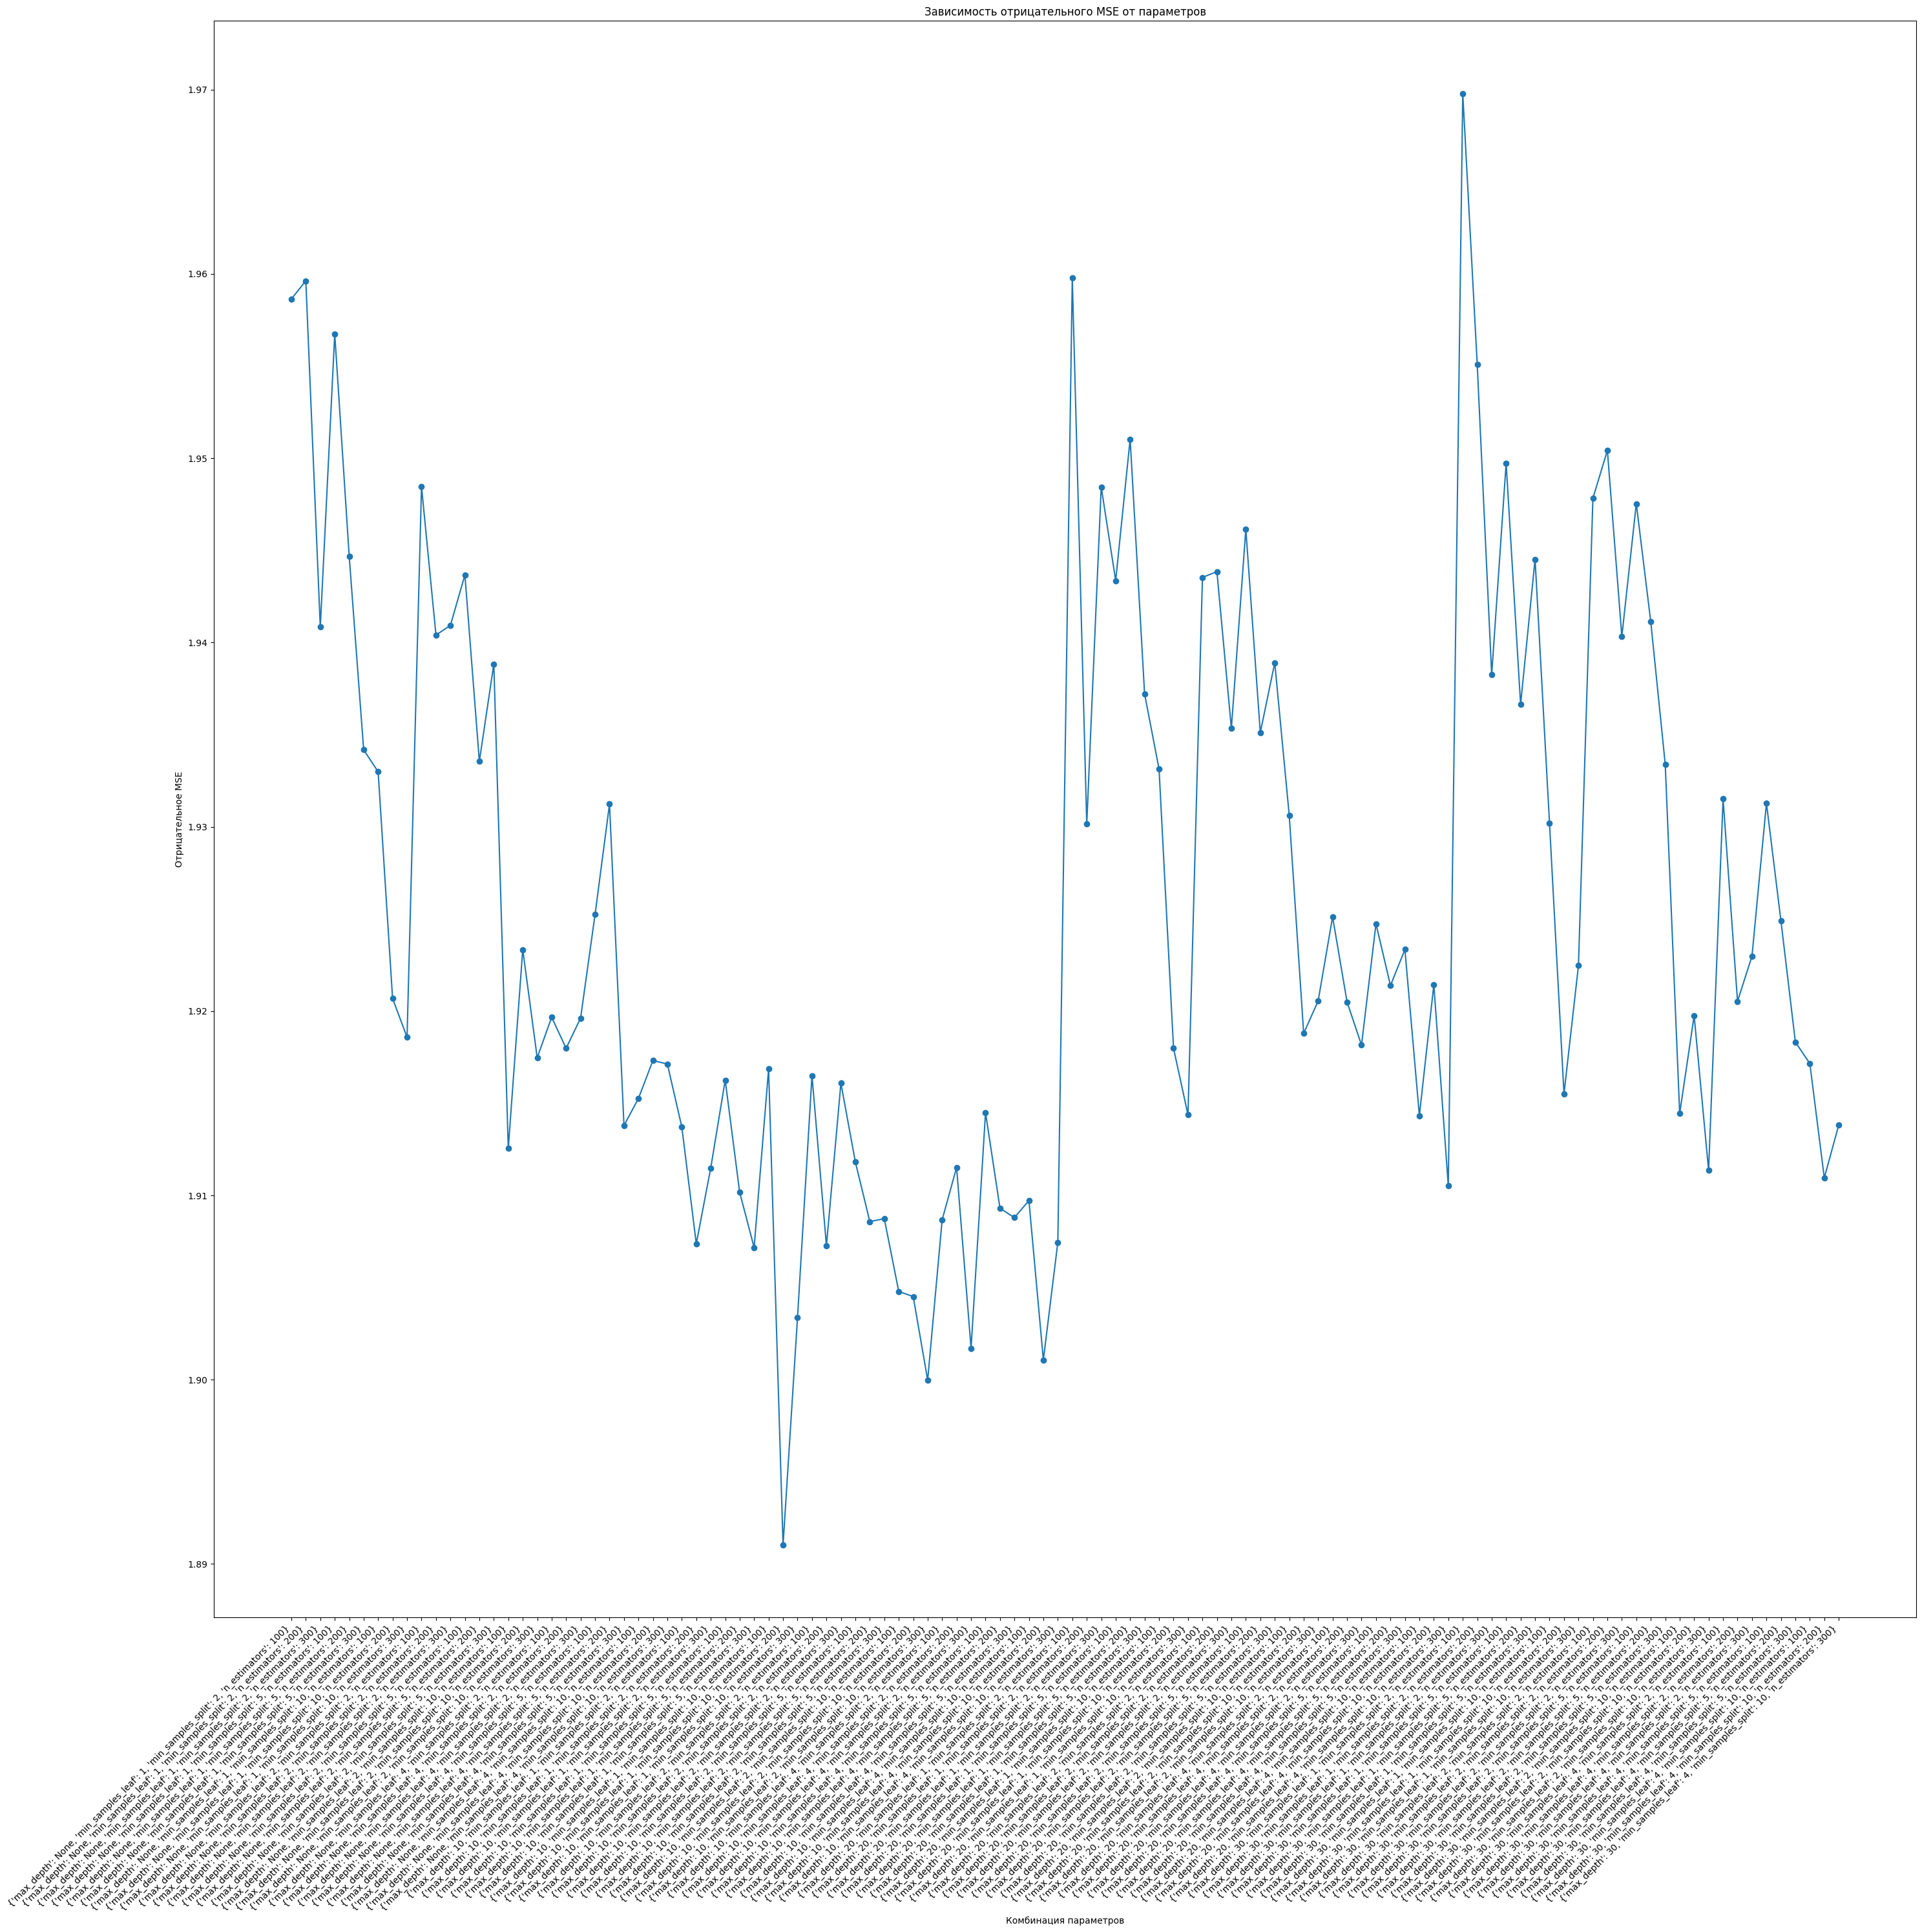

Тестовая выборка: R-квадрат = 0.11640318859798482 MSE = 1.8741257105718068
Тренировочная выборка: R-квадрат = 0.43212174538164116 MSE = 1.1820510472596957


In [17]:
# Получаем лучшие параметры
best_params = grid_search.best_params_

# Получаем лучшую модель
best_model = grid_search.best_estimator_

# Получим предсказания на тестовой и тренировочной выборках
predictions_test = best_model.predict(X_test)
predictions_train = best_model.predict(X_train)

# Рассчитаем R-квадрат для тестовой и тренировочной выборок
r2_test = r2_score(y_test, predictions_test)
r2_train = r2_score(y_train, predictions_train)

# Рассчитаем среднеквадратичную ошибку для тестовой и тренировочной выборок
mse_test = mean_squared_error(y_test, predictions_test)
mse_train = mean_squared_error(y_train, predictions_train)

# Вывод оптимальных параметров
print("Оптимальные параметры:", grid_search.best_params_)

# Построение графика зависимости ошибки от параметров
params_combinations = [str(params) for params in grid_search.cv_results_['params']]
scores = -grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(30,30))
plt.plot(scores, marker='o')

# Явное задание распределения меток по оси X
plt.xticks(np.arange(len(params_combinations)), params_combinations, rotation=45, ha='right')

plt.title('Зависимость отрицательного MSE от параметров')
plt.xlabel('Комбинация параметров')
plt.ylabel('Отрицательное MSE')
plt.tight_layout()  # Автоматическое распределение макета для избежания обрезки
plt.show()

# Выведем результаты
print("Тестовая выборка: R-квадрат =", r2_test, "MSE =", mse_test)
print("Тренировочная выборка: R-квадрат =", r2_train, "MSE =", mse_train)

На графике видно, что при достижении глубины больше 20, значение ошибки начинает увеличиваться, поэтому необходимо рассматривать все значения, до глубины 20. Наблюдается тенденция, что при увеличении количества деревьев, показатель ошибки уменьшается.

Тестовая выборка: R-квадрат = 0.11791219099943018 MSE = 1.870925087661708
Тренировочная выборка: R-квадрат = 0.4665282922482742 MSE = 1.110433065015199

Значения R-квадрат показывают, что ваша модель случайного леса объясняет примерно 11% дисперсии в данных. Это может указывать на более сильную связь между предсказанными значениями и фактическими значениями по сравнению с линейной регрессией.

Значения MSE показывают среднеквадратическую ошибку модели. Значение MSE около 1.87 на тестовой выборке довольно низкое, что может свидетельствовать о хорошей производительности модели.

In [18]:
from sklearn.neural_network import MLPRegressor
# Выберем случайный фильм из вашего датасета
selected_features = ['Release Date','Release Country','Movie Rating',
            'Movie Run Time','Cast','Filming Locations','Budget']

for i in range(10):
  print(f'\nТест номер : {i}')
  random_film = dataset.sample(1)

  # Оставим только признаки, которые использовались для обучения модели (исключая 'Title', 'Review Rating', 'Plot')
  selected_features = random_film.drop(['Title','Review Rating' ,'Plot'], axis=1)

  print("Название фильма:", random_film['Title'].values[0])
  # Предсказание оценки для отдельного случайного фильма
  predicted_rating = best_model.predict(selected_features)
  print("Предсказанная оценка фильма:", predicted_rating)

  # Получение значения по конкретной строке и столбцу
  Rating = random_film.loc[random_film.index[0], 'Review Rating']
  print("Настоящая оценка фильма:", [Rating])


Тест номер : 0
Название фильма: Terror Toons 3 (2015)
Предсказанная оценка фильма: [4.92604242]
Настоящая оценка фильма: [4.5]

Тест номер : 1
Название фильма: Üç Harfliler 3: Karabüyü (2016)
Предсказанная оценка фильма: [5.79775285]
Настоящая оценка фильма: [7.4]

Тест номер : 2
Название фильма: K-Shop (2016)
Предсказанная оценка фильма: [5.97220673]
Настоящая оценка фильма: [6.6]

Тест номер : 3
Название фильма: Nine Miles Down (2009)
Предсказанная оценка фильма: [4.91486511]
Настоящая оценка фильма: [5.5]

Тест номер : 4
Название фильма: Dark House (2014)
Предсказанная оценка фильма: [5.17900464]
Настоящая оценка фильма: [4.7]

Тест номер : 5
Название фильма: The Revenant (2009)
Предсказанная оценка фильма: [5.47472699]
Настоящая оценка фильма: [6.3]

Тест номер : 6
Название фильма: The Warning (2015)
Предсказанная оценка фильма: [4.455243]
Настоящая оценка фильма: [4.7]

Тест номер : 7
Название фильма: Fear Is Coming (2016)
Предсказанная оценка фильма: [5.11470543]
Настоящая оценк

Как мы видим по результатам 10 тестов, предсказанные оценки фильмов всё ещё отличаются от настоящий оценок, что говорит нам о несовершённости модели.



---
**Полносвязная (неглубокая - скрытых 1-2 слоя) нейронная сеть**


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X = dataset.drop(['Title','Review Rating', 'Plot'], axis=1)  # Признаки (все столбцы, кроме 'Title','Review Rating','Plot')
y = dataset['Review Rating']  # Целевая переменна
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=56)

input_dim = X_train.shape[1]
# Создаем модель
model = Sequential()
model.add(Dense(10, input_dim=input_dim, activation='relu'))
model.add(Dense(1))

# Компилируем модель
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Обучаем модель на тренировочных данных
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)

# Оцениваем модель на тестовых данных
loss, mse = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test MSE: {mse}')

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 23.5210 - mse: 23.5210 - val_loss: 8.6177 - val_mse: 8.6177
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.5853 - mse: 5.5853 - val_loss: 2.6009 - val_mse: 2.6009
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5805 - mse: 2.5805 - val_loss: 2.4319 - val_mse: 2.4319
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.3482 - mse: 2.3482 - val_loss: 2.3176 - val_mse: 2.3176
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.2083 - mse: 2.2083 - val_loss: 2.1966 - val_mse: 2.1966
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.2242 - mse: 2.2242 - val_loss: 2.1159 - val_mse: 2.1159
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1754 - mse: 2.1754 - val_loss: 2.0451 - val_mse: 2.0451
Epoch 8/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0258 - mse: 2.0258 - val_loss: 1.9940 - val_mse: 1.9940
Epoch 9/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.115

In [20]:
from sklearn.neural_network import MLPRegressor
# Выберем случайный фильм из вашего датасета
selected_features = ['Release Date','Release Country','Movie Rating',
            'Movie Run Time','Cast','Filming Locations','Budget']

for i in range(10):
  print(f'\nТест номер : {i}')
  random_film = dataset.sample(1)

  # Оставим только признаки, которые использовались для обучения модели (исключая 'Title', 'Review Rating', 'Plot')
  selected_features = random_film.drop(['Title','Review Rating' ,'Plot'], axis=1)

  print("Название фильма:", random_film['Title'].values[0])
  # Предсказание оценки для отдельного случайного фильма
  predicted_rating = model.predict(selected_features)
  print("Предсказанная оценка фильма:", predicted_rating)

  # Получение значения по конкретной строке и столбцу
  Rating = random_film.loc[random_film.index[0], 'Review Rating']
  print("Настоящая оценка фильма:", [Rating])


Тест номер : 0
Название фильма: Without Name (2016)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Предсказанная оценка фильма: [[5.4141273]]
Настоящая оценка фильма: [5.6]

Тест номер : 1
Название фильма: Wrong Turn 6: Last Resort (2014)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Предсказанная оценка фильма: [[4.4056115]]
Настоящая оценка фильма: [4.3]

Тест номер : 2
Название фильма: Collective: Unconscious (2016)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Предсказанная оценка фильма: [[5.2183156]]
Настоящая оценка фильма: [6.9]

Тест номер : 3
Название фильма: Local God (2014)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Предсказанная оценка фильма: [[5.158004]]
Настоящая оценка фильма: [5.9]

Тест номер : 4
Название фильма: The Devil Incarnate (2013)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Предсказанная оценка фильма: [[4.95373]]
Настоящая оценка фильма: [3.4]

Тест номер : 5
Название фильма: Dhilluku Dhuddu (2016)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Предсказанная оценка фильма: [[5.678418]]
Настоящая оцен

Как можно увидеть, данная модель предсказывает рейтинг фильма, также плохо, как и другие модели.



---


## **"Обязательно изобразите confusion matrix!"**

Важно уточнить, что матрица ошибок (Confusion Matrix) используется в задачах классификации, а не в задачах регрессии. Таким образом, для нашей задачи прогнозирования оценки фильма, где оценка является непрерывной переменной, Confusion Matrix не имеет смысла.

Confusion Matrix предназначена для оценки производительности моделей классификации и содержит информацию о количестве верных и неверных прогнозов в каждой из четырех категорий: True Positive (TP), True Negative (TN), False Positive (FP), и False Negative (FN).



---


## **Вывод:**


Из предоставленных метрик видно, что все три модели (линейная регрессия, рандомный лес и полносвязная нейронная сеть) показывают схожие результаты по метрикам R-квадрат и MSE. Давайте рассмотрим выводы для каждой модели:

**Линейная регрессия:**

Тестовая выборка: R-квадрат = 0.085, MSE = 1.941
Тренировочная выборка: R-квадрат = 0.141, MSE = 1.789
Модель, вероятно, не слишком хорошо обобщает данные, поскольку значения R-квадрат и MSE не очень высоки.


**Рандомный лес:**

Тестовая выборка: R-квадрат = 0.118, MSE = 1.871
Тренировочная выборка: R-квадрат = 0.467, MSE = 1.110
Модель проявляет лучшую производительность, чем линейная регрессия, но также можно подумать о возможности регуляризации для предотвращения переобучения.


**Полносвязная нейронная сеть:**

Тестовая выборка: Test Loss = 1.980, Test MSE = 1.980
Модель имеет схожие значения MSE с линейной регрессией и рандомным лесом, но может требовать дополнительной настройки гиперпараметров или более сложной архитектуры.


**Общие выводы:**

Ни одна из моделей не показывает очень высокие значения R-квадрат или очень низкие MSE, что может указывать на то, что предсказание оценок фильмов является сложной задачей.


Помимо этого важно заметить, что признаки плохо связаны друг с другом. Возможно нужно подобрать другой способ обработки признаков и нормализации, тогда результат может быть лучше.


По хорошему, в нашем датасете также большое количество пропущенных значений, которые плохо влияют на результат обучения, и малое количество данных аналогично не идёт на пользу результату обучения.


Важно оценить, какие именно ошибки допускают модели, и, возможно, рассмотреть дополнительные методы предварительной обработки данных, подбора признаков или настройки гиперпараметров для улучшения производительности.


Если обратить внимание на график после подбора гиперпараметров для случайного леса и на результат полносвязной нейронной сети я считаю, что это две наиболее подходящих модели для решения моей задачи регрессии. Просто в дальнейшем необходимо правильно подобрать гиперпараметры и правильно собрать нейронную сеть.
